## Airbnb listings for Broward County, FL
Task 6.1 Cleaning and understanding the data

Content:
1. Importing libraries and files
2. Cleaning procedures
3. Understanding the data

# 1 . Importing libraries and files

In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [3]:
df_airbnb = pd.read_csv(r'D:\CareerFoundry\Data Immersion\Task 6\AirBnB Broward County FL Data\02 Data\Original data\2021_09 Airbnb Broward County_original.csv')

In [4]:
df_airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11950 entries, 0 to 11949
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              11950 non-null  int64  
 1   name                            11950 non-null  object 
 2   host_id                         11950 non-null  int64  
 3   host_name                       11913 non-null  object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   11950 non-null  object 
 6   latitude                        11950 non-null  float64
 7   longitude                       11950 non-null  float64
 8   room_type                       11950 non-null  object 
 9   price                           11950 non-null  int64  
 10  minimum_nights                  11950 non-null  int64  
 11  number_of_reviews               11950 non-null  int64  
 12  last_review                     

In [5]:
df_airbnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,57818,Private house close to the beach!,275948,VonJon,NaN,Hollywood,26.01670,-80.12437,Entire home/apt,191,2,55,8/1/2021,0.56,1,359,14,NaN
1,69824,2 bd/2ba Oceanfront Condo,351303,Tracy,NaN,Hallandale Beach,25.97641,-80.12052,Entire home/apt,110,30,2,3/27/2021,0.05,2,201,1,NaN
2,83449,MARY POP APTS 2/1 APT SLEEP 5,454736,"Jon, Mary Pop Apartments",NaN,Dania Beach,26.03392,-80.14201,Entire home/apt,99,7,20,1/26/2020,0.17,8,119,0,NaN
3,105411,House in the Ranches,532930,Sonia,NaN,Southwest Ranches,26.04678,-80.36809,Entire home/apt,235,4,5,8/27/2012,0.05,1,116,0,NaN
4,129061,MIAMI - LUXURY APARTMENT OVER BEACH,637272,Bianca,NaN,Hollywood,25.99332,-80.11887,Entire home/apt,250,20,18,3/26/2021,0.16,6,364,3,NaN


In [7]:
df_airbnb.isnull().sum()

id                                    0
name                                  0
host_id                               0
host_name                            37
neighbourhood_group               11950
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                        2450
reviews_per_month                  2450
calculated_host_listings_count        0
availability_365                      0
number_of_reviews_ltm                 0
license                           11949
dtype: int64

# 2. Cleaning procedures

Dropping columns:
- 'host_name': the host's name combined with the property's id may implicate some personal identifications issues thus will be dropped
- 'neighbourhood_group' and 'license': both columns are empty thus will be dropped
- 'name': this variable will be dropped now but may be used for textual analysis in Tableau


Renaming columns:
- 'id': means 'property_id' thus will be renamed as such


Missing values:
- in the columns 'last_review' and 'reviews_per_month' there is an equal count of missing values which indicates that 2450 properties haven't been reviewed yet thus these values will not be addressed

Mixed data types and duplicates will be checked below.

In [9]:
# dropping the columns

df_airbnb.drop(columns = ['name','host_name','neighbourhood_group', 'license'], inplace = True)

In [13]:
df_airbnb.head()

,property_id,collection_date,listing_name,host_id,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,57818,2021_09,Private house close to the beach!,275948,Hollywood,26.01670,-80.12437,Entire home/apt,191,2,55,8/1/2021,0.56,1,359,14
1,69824,2021_09,2 bd/2ba Oceanfront Condo,351303,Hallandale Beach,25.97641,-80.12052,Entire home/apt,110,30,2,3/27/2021,0.05,2,201,1
2,83449,2021_09,MARY POP APTS 2/1 APT SLEEP 5,454736,Dania Beach,26.03392,-80.14201,Entire home/apt,99,7,20,1/26/2020,0.17,8,119,0
3,105411,2021_09,House in the Ranches,532930,Southwest Ranches,26.04678,-80.36809,Entire home/apt,235,4,5,8/27/2012,0.05,1,116,0
4,129061,2021_09,MIAMI - LUXURY APARTMENT OVER BEACH,637272,Hollywood,25.99332,-80.11887,Entire home/apt,250,20,18,3/26/2021,0.16,6,364,3


In [10]:
# renaming the columns

df_airbnb.rename(columns = {'id' : 'property_id'}, inplace = True)

In [11]:
df_airbnb.head()

,property_id,host_id,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,57818,275948,Hollywood,26.01670,-80.12437,Entire home/apt,191,2,55,8/1/2021,0.56,1,359,14
1,69824,351303,Hallandale Beach,25.97641,-80.12052,Entire home/apt,110,30,2,3/27/2021,0.05,2,201,1
2,83449,454736,Dania Beach,26.03392,-80.14201,Entire home/apt,99,7,20,1/26/2020,0.17,8,119,0
3,105411,532930,Southwest Ranches,26.04678,-80.36809,Entire home/apt,235,4,5,8/27/2012,0.05,1,116,0
4,129061,637272,Hollywood,25.99332,-80.11887,Entire home/apt,250,20,18,3/26/2021,0.16,6,364,3


In [12]:
# mixed-data type

for col in df_airbnb.columns.tolist():
  weird = (df_airbnb[[col]].applymap(type) != df_airbnb[[col]].iloc[0].apply(type)).any(axis = 1)
  if len (df_airbnb[weird]) > 0:
    print (col)

last_review


In [ ]:
# the 2450 observations have empty cells with no date for the last review and are recognized as mixed-data type; this issue will not be addressed

In [13]:
# duplicates

df_airbnb_dups = df_airbnb[df_airbnb.duplicated()]

In [14]:
df_airbnb_dups

# no duplicates found

,property_id,host_id,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm


# 3. Understanding the data

In [15]:
# changing numeric data types into categorical columns so that they do not come up in the descriptive statistics

df_airbnb['property_id'] = df_airbnb['property_id'].astype('object')
df_airbnb['host_id'] = df_airbnb['host_id'].astype('object')

In [16]:
df_airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11950 entries, 0 to 11949
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   property_id                     11950 non-null  object 
 1   host_id                         11950 non-null  object 
 2   neighbourhood                   11950 non-null  object 
 3   latitude                        11950 non-null  float64
 4   longitude                       11950 non-null  float64
 5   room_type                       11950 non-null  object 
 6   price                           11950 non-null  int64  
 7   minimum_nights                  11950 non-null  int64  
 8   number_of_reviews               11950 non-null  int64  
 9   last_review                     9500 non-null   object 
 10  reviews_per_month               9500 non-null   float64
 11  calculated_host_listings_count  11950 non-null  int64  
 12  availability_365                

In [17]:
# descriptive statistics

df_airbnb.describe()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,11950.000000,11950.000000,11950.000000,11950.000000,11950.000000,9500.000000,11950.000000,11950.000000,11950.000000
mean,26.101677,-80.145346,226.395900,5.820084,24.681004,2.987657,14.292552,208.734728,10.555565
std,0.100753,0.058171,371.189397,17.780007,44.917039,5.820630,25.210386,118.581682,15.602618
min,25.957550,-80.419220,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,26.005675,-80.155268,91.000000,1.000000,1.000000,0.540000,1.000000,90.000000,0.000000
50%,26.108410,-80.124553,148.000000,2.000000,8.000000,1.430000,4.000000,215.000000,4.000000
75%,26.175317,-80.115980,243.000000,4.000000,29.000000,3.152500,14.750000,325.000000,15.000000
max,26.333410,-80.075020,10000.000000,500.000000,599.000000,125.000000,146.000000,365.000000,278.000000


PRICE

The average price per night is 226 for the column; there are observations with a minimal value of 0 and 10.000 per night which seems to be odd; those few high values seem to be outliers and skew the distribution to the right.

In [18]:
df_airbnb['price'].value_counts(dropna = False)

150     176
100     160
99      143
80      138
120     138
       ... 
17        1
1069      1
1283      1
1083      1
1149      1
Name: price, Length: 857, dtype: int64

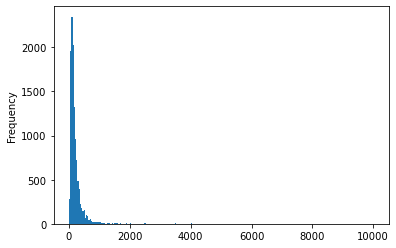

In [19]:
df_price = df_airbnb['price'].plot.hist(bins = 250)

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

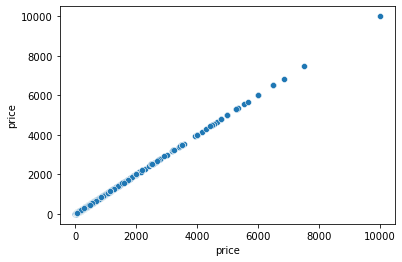

In [21]:
scatter_price = sns.scatterplot(x = 'price', y = 'price', data = df_airbnb)

MINIMUM NIGTHS STAY

The average minimum stay is 5 nights; the most common number of minimum nights is 1, followed by 2 and 3; there are some odd values with a minimum stay of 300 or 500 and, as outliers, they drive the mean high up. 

In [22]:
df_airbnb['minimum_nights'].value_counts(dropna = False)

1      3543
2      2757
3      2420
4       858
5       638
7       604
30      380
6       159
14       91
90       77
28       71
10       60
21       32
15       30
60       27
180      27
20       22
120      20
29       18
31       17
25       12
13        9
32        9
27        6
12        6
56        5
8         5
9         5
365       4
150       3
26        3
58        3
210       3
184       2
360       2
45        2
80        2
24        2
84        1
70        1
333       1
130       1
18        1
35        1
181       1
61        1
93        1
91        1
300       1
500       1
183       1
50        1
118       1
17        1
Name: minimum_nights, dtype: int64

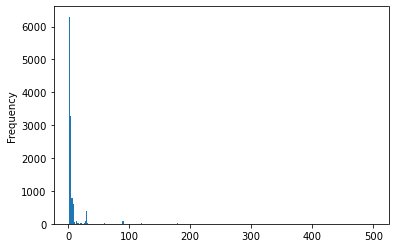

In [23]:
df_minstay = df_airbnb['minimum_nights'].plot.hist(bins = 250)

# There are many strange values in this column, for example the property is offered for minimum stay of 500 nights

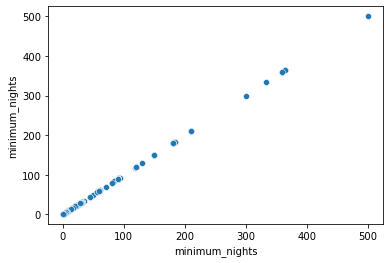

In [24]:
scatter_minstay = sns.scatterplot(x = 'minimum_nights', y = 'minimum_nights', data = df_airbnb)

NUMBER OF REVIEWS

The average number of reviews is 24; from the cleaning operation I know that the column has 2450 cells with no review and 0 is the mode, followed by the next common values of 1 and 2 reviews. In this column, I noticed many odd values with its record number of reviews of 599.

In [25]:
df_airbnb['number_of_reviews'].value_counts(dropna = False)

0      2450
1       962
2       686
3       488
4       449
       ... 
338       1
246       1
320       1
362       1
273       1
Name: number_of_reviews, Length: 305, dtype: int64

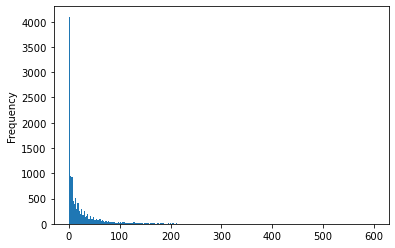

In [26]:
df_reviews = df_airbnb['number_of_reviews'].plot.hist(bins = 250)

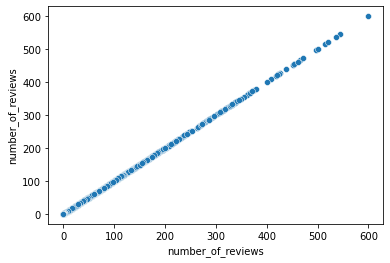

In [27]:
scatter_reviews = sns.scatterplot(x = 'number_of_reviews', y = 'number_of_reviews', data = df_airbnb)

The number of reviews per month is a calculated field with an average of almost 3 for the column. Extremely strange is the maximum value of 125 reviews per month where the maximum rental occupancy of one property logically cannot exceed the number of nights in a given month.

LISTINGS PER HOST

The calculated field for the number of listings owned by the same host shows the average value of 14 listings per host. The maximum number of listings of 146 per host seems to be unmanageable by one owner.

In [28]:
df_airbnb['calculated_host_listings_count'].value_counts(dropna = False)

1      3437
2      1476
3       882
4       652
5       560
6       420
7       294
11      231
8       216
16      192
10      190
18      180
12      168
55      165
9       153
19      152
146     146
13      143
14      140
27      135
117     117
56      112
36      108
103     103
51      102
49       98
31       93
23       92
15       90
24       72
71       71
69       69
17       68
63       63
30       60
53       53
26       52
52       52
25       50
50       50
48       48
45       45
22       44
43       43
21       42
40       40
38       38
34       34
32       32
29       29
28       28
20       20
Name: calculated_host_listings_count, dtype: int64

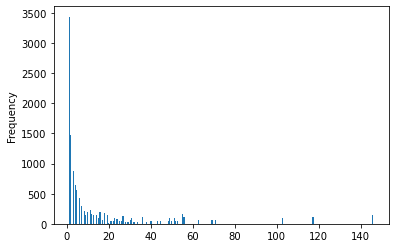

In [29]:
df_hostlist = df_airbnb['calculated_host_listings_count'].plot.hist(bins = 250)

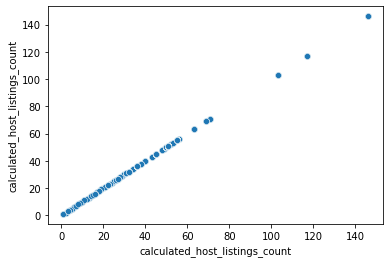

In [30]:
scatter_hostlist = sns.scatterplot(x = 'calculated_host_listings_count', y = 'calculated_host_listings_count', data = df_airbnb)

-The column ‘availability_365’ shows the number of days open in the property’s calendar for bookings for the next 12 months from the scrape date. The average is 208 days, the minimum is 0 days meaning the calendar is fully booked, and the maximum is 365.

NUMBER OF REVIEWS IN THE LAST 12 MONTHS

From the column number of reviews in the last 12 months I learned that, on average, guests left 10 reviews per property during this period. The maximum value for this field is 278. The most common value is 0, followed by 1.

In [31]:
df_airbnb['number_of_reviews_ltm'].value_counts(dropna = False)

0      3436
1      1007
2       703
3       535
4       465
       ... 
217       1
100       1
87        1
278       1
154       1
Name: number_of_reviews_ltm, Length: 115, dtype: int64

The 11,950 listings are hosted by 5,071 owners.

All listings are divided into 34 geographical regions in Broward County, FL. 

11,445 observations have unique advertising descriptions meaning some use the same phrasing.

Out of 4 types of property, the majority falls into the “Entire home/apt” category.

All data was scraped on September 27, 2021.

In [32]:
print(df_airbnb.nunique())

property_id                       11950
host_id                            5071
neighbourhood                        34
latitude                           8271
longitude                          7137
room_type                             4
price                               857
minimum_nights                       54
number_of_reviews                   305
last_review                         866
reviews_per_month                  1185
calculated_host_listings_count       52
availability_365                    366
number_of_reviews_ltm               115
dtype: int64


In [33]:
df_airbnb['host_id'].value_counts(dropna = False)

1833853      146
20234196     117
14310639     103
174780501     71
45914148      69
            ... 
271945667      1
21339490       1
98951328       1
12699988       1
136226960      1
Name: host_id, Length: 5071, dtype: int64

In [35]:
df_airbnb['room_type'].value_counts(dropna = False)

Entire home/apt    9650
Private room       2103
Shared room         128
Hotel room           69
Name: room_type, dtype: int64

In [36]:
# exporting the wrangled set

df_airbnb.to_csv(r'D:\CareerFoundry\Data Immersion\Task 6\AirBnB Broward County FL Data\02 Data\Prepared data\2021_09 Airbnb Broward County_task 6_1_cleaning and understanding.csv', index=False)